In [96]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [97]:
# df = pd.read_csv("New_Datset_Employee_Turnover_Old1.csv")
df = pd.read_csv("New_Datset_Employee_Turnover_Original_Use.csv")
df.head()

,EPF_Number__t2o,Gender,PermanentRecidence_cat,Recidence,CivilStatus_cat,HighestEducationQualification_cat,InterviewedBy,ExtraCurricularActivities,ApparelRelatedVocationalQualification,PreviousJob,...,Weight,MedicalTest,IQTestScore,ExpectedSalary,FollowingExternalCourses,LastBasicSal_cat,Age Category,Age Joined,Age(Median),Is Terminated
0,1,Female,Yes,ComingFromHome,Married,PassedOL,Lahiru,False,False,Apparel,...,51,Passed,80,25000,No,15000to30000,3,25,27,No
1,2,Female,Yes,ComingFromHome,Unmarried,UptoOL,Lahiru,False,False,Apparel,...,48,Passed,70,25000,No,15000to30000,1,19,19,No
2,3,Female,Yes,ComingFromHome,Married,UptoOL,Lahiru,False,False,Apparel,...,61,Passed,0,25000,No,15000to30000,5,35,38,No
3,4,Female,No,ComingFromHome,Unmarried,UptoOL,Lahiru,False,False,Apparel,...,46,Passed,0,25000,No,15000to30000,2,24,22,No
4,5,Female,Yes,ComingFromHome,Unmarried,PassedAL,Lahiru,True,False,NoJob,...,51,Passed,100,25000,Yes,NoJob,2,22,22,No


In [98]:
df.shape
total = df.shape[0]

In [99]:
df.dtypes

EPF_Number__t2o                             int64
Gender                                     object
PermanentRecidence_cat                     object
Recidence                                  object
CivilStatus_cat                            object
HighestEducationQualification_cat          object
InterviewedBy                              object
ExtraCurricularActivities                    bool
ApparelRelatedVocationalQualification        bool
PreviousJob                                object
ExperiencedSection_cat                     object
RelativesInApparel                           bool
SpouseOccupation_cat                       object
FamilyOppinionAboutTheJob                  object
Referel_cat                                object
ExpectationOfDoingTheJob_cat               object
AvailabilityOfTransportNearTheResidence    object
RetentionCategory                          object
SelectedDepartment                         object
ReasonForChooseApparel                     object


In [100]:
df.isna().sum()

EPF_Number__t2o                            0
Gender                                     0
PermanentRecidence_cat                     0
Recidence                                  0
CivilStatus_cat                            0
HighestEducationQualification_cat          0
InterviewedBy                              0
ExtraCurricularActivities                  0
ApparelRelatedVocationalQualification      0
PreviousJob                                0
ExperiencedSection_cat                     0
RelativesInApparel                         0
SpouseOccupation_cat                       0
FamilyOppinionAboutTheJob                  0
Referel_cat                                0
ExpectationOfDoingTheJob_cat               0
AvailabilityOfTransportNearTheResidence    0
RetentionCategory                          0
SelectedDepartment                         0
ReasonForChooseApparel                     0
PreviousWorkPlace                          0
PersonalImpression                         0
Contributi

In [101]:
df.isnull().values.any()

False

In [102]:
# Get employee termination statistics
df['Is Terminated'].value_counts()

No     548
Yes    539
Name: Is Terminated, dtype: int64

In [103]:
# Describe the data set
df.describe()

,EPF_Number__t2o,Height,Weight,IQTestScore,ExpectedSalary,Age Category,Age Joined,Age(Median)
count,1087.000000,1087.000000,1087.000000,1087.000000,1087.000000,1087.000000,1087.000000,1087.000000
mean,544.000000,161.998160,52.873045,74.482061,25556.172953,2.639374,25.538178,25.705612
std,313.934176,8.060316,9.552341,24.321273,8252.380118,1.296203,6.942421,6.323084
min,1.000000,64.000000,5.000000,0.000000,13500.000000,1.000000,18.000000,19.000000
25%,272.500000,157.000000,48.000000,70.000000,25000.000000,2.000000,20.000000,22.000000
50%,544.000000,162.000000,52.000000,80.000000,25000.000000,2.000000,23.000000,22.000000
75%,815.500000,168.000000,58.000000,90.000000,25000.000000,4.000000,30.000000,32.000000
max,1087.000000,185.000000,165.000000,100.000000,280000.000000,5.000000,62.000000,38.000000


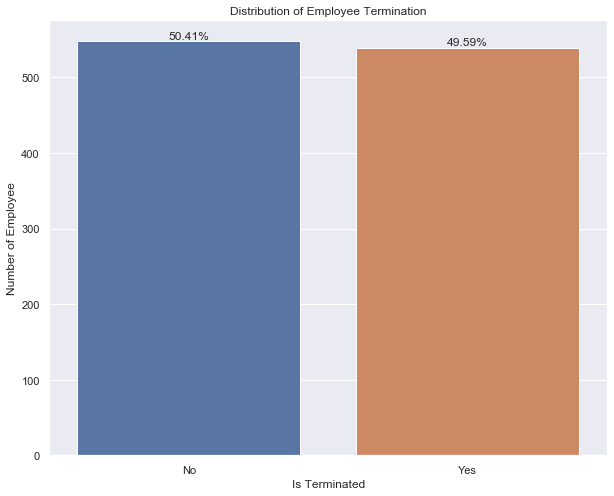

In [106]:
# Employee Termination Bar Chart
plt.title('Distribution of Employee Termination')
plt.xlabel('Number of Axles')
sns.set(rc={'figure.figsize':(10,8)})
ax = sns.countplot(df['Is Terminated'])
ax.set_ylabel('Number of Employee')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total * 100),
            ha="center")

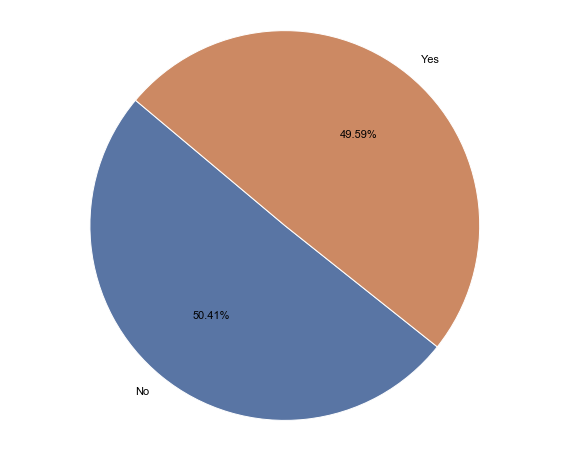

In [107]:
# Employee Termination PIE Chart
labels = 'No', 'Yes'
sizes = [548, 539]
colors = ['#5975a4', '#cc8963']
explode = (0, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors, startangle=140,autopct='%1.2f%%',textprops={'color':"black",'size':11})
plt.axis('equal')
plt.show()

In [108]:
(1087 - 539) / 1087
total = df.shape[0]

Text(0.5, 1.0, 'Distribution of Employee Termination Over Age Joined')

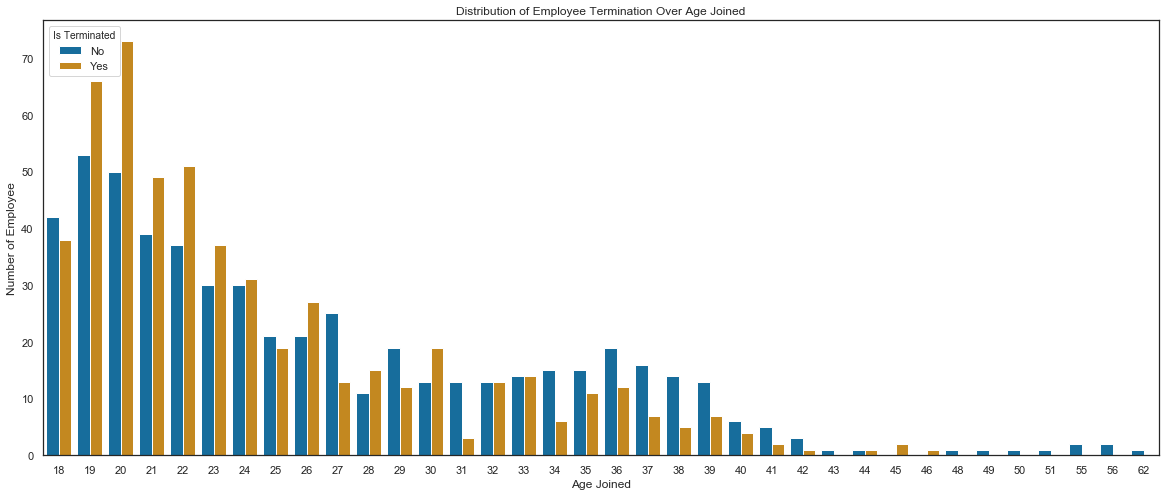

In [68]:
#Show the number of employees that left and stayed by age

# plt.subplots(figsize=(25,12))
# sns.countplot(x='Age Joined', hue='Is Terminated', data= df, palette = 'colorblind')
# sns.catplot('Age Joined', data=df, aspect=3, kind='count', hue='Is Terminated', palette=['C1', 'C0']).set_ylabels('Number of Employees')

plt.subplots(figsize=(20,8))
ax = sns.countplot(x='Age Joined', hue='Is Terminated', data= df, palette = 'colorblind')
ax.set_xlabel('Age Joined')
ax.set_ylabel('Number of Employee')
ax.set_title("Distribution of Employee Termination Over Age Joined")

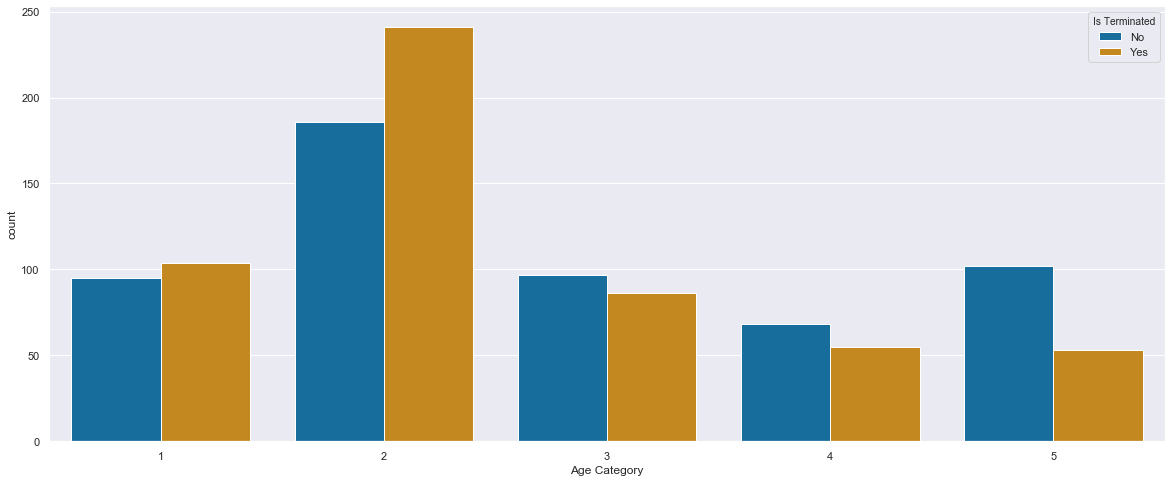

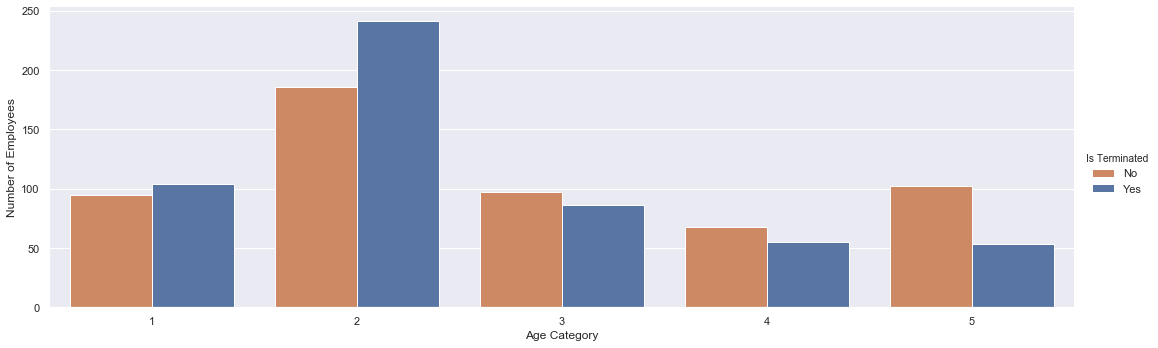

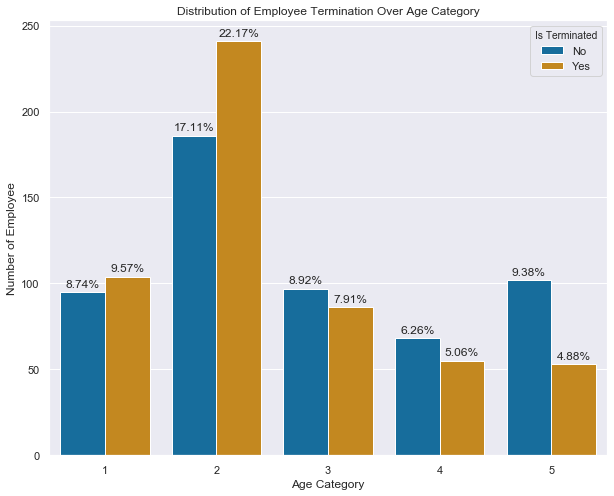

In [113]:
#Show the number of employees that left and stayed by age
plt.subplots(figsize=(20,8))
sns.countplot(x='Age Category', hue='Is Terminated', data= df, palette = 'colorblind')
sns.catplot('Age Category', data=df, aspect=3, kind='count', hue='Is Terminated', palette=['C1', 'C0']).set_ylabels('Number of Employees')

plt.subplots(figsize=(10,8))
ax = sns.countplot(x='Age Category', hue='Is Terminated', data= df, palette = 'colorblind')
ax.set_xlabel('Age Category')
ax.set_ylabel('Number of Employee')
ax.set_title("Distribution of Employee Termination Over Age Category")
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total * 100),
            ha="center")

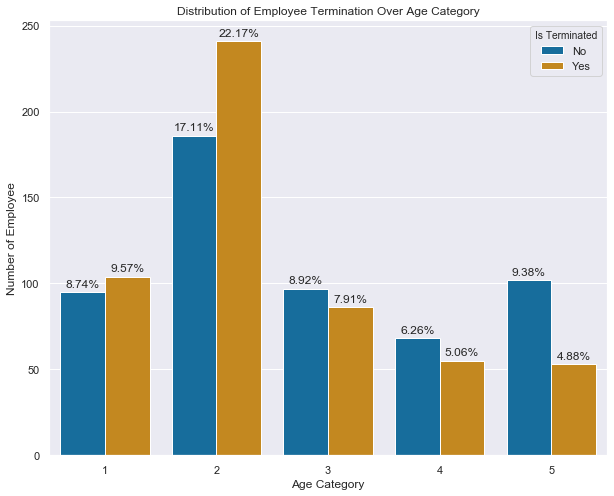

In [115]:
#Show the age category distribution
plt.subplots(figsize=(10,8))
ax = sns.countplot(x='Age Category', hue='Is Terminated', data= df, palette = 'colorblind')
ax.set_xlabel('Age Category')
ax.set_ylabel('Number of Employee')
ax.set_title("Distribution of Employee Termination Over Age Category")
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total * 100),
            ha="center")

In [119]:
# Statistics about the categorical data
for column in df.columns:
    if df[column].dtype == object:
        print(str(column) + ' : ' + str(df[column].unique()))
        print(df[column].value_counts())
        print('____________________________________________')
        print(df[column].value_counts(normalize=True) * 100)
        print('____________________________________________')

PermanentRecidence_cat : ['Yes' 'No']
Yes    556
No     531
Name: PermanentRecidence_cat, dtype: int64
____________________________________________
Yes    51.149954
No     48.850046
Name: PermanentRecidence_cat, dtype: float64
____________________________________________
Recidence : ['ComingFromHome' 'Boarded' 'ComingFromRelativesPlace']
ComingFromHome              867
Boarded                     194
ComingFromRelativesPlace     26
Name: Recidence, dtype: int64
____________________________________________
ComingFromHome              79.760810
Boarded                     17.847286
ComingFromRelativesPlace     2.391904
Name: Recidence, dtype: float64
____________________________________________
CivilStatus_cat : ['Married' 'Unmarried' 'NoSpouse']
Unmarried    594
Married      473
NoSpouse      20
Name: CivilStatus_cat, dtype: int64
____________________________________________
Unmarried    54.645814
Married      43.514259
NoSpouse      1.839926
Name: CivilStatus_cat, dtype: float64
______

In [117]:
df = df.drop('Gender', axis = 1)
df = df.drop('FamilyOppinionAboutTheJob', axis = 1)
df = df.drop('AvailabilityOfTransportNearTheResidence', axis = 1)
df = df.drop('MedicalTest', axis = 1)
df = df.drop('EPF_Number__t2o', axis = 1)

In [118]:
corr = df.corr()

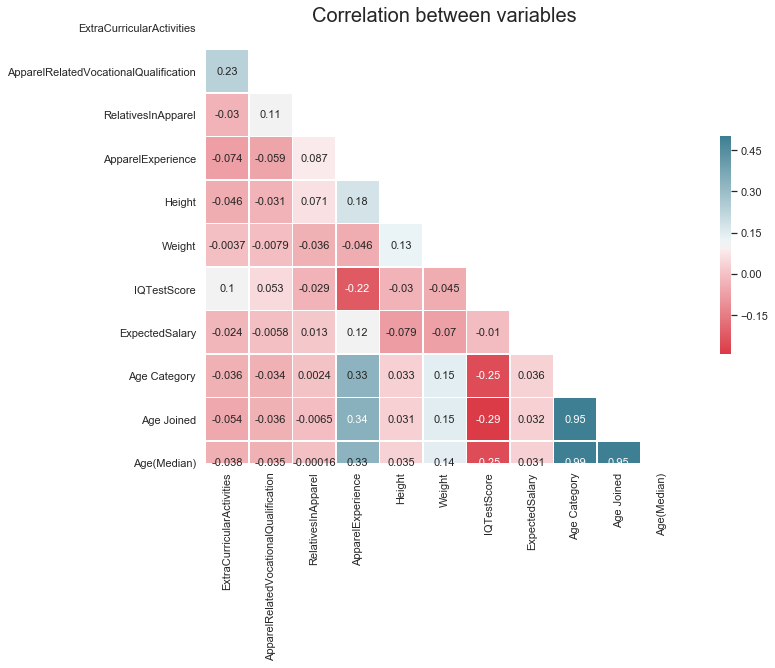

In [73]:
# Heat map

sns.set(style='white')

mask = np.zeros_like(corr, dtype=np.bool)

mask[np.triu_indices_from(mask)] = True

# Inserir a figura
f, ax = plt.subplots(figsize=(13,8))

cmap = sns.diverging_palette(10,220, as_cmap=True)

#Desenhar o heatmap com a máscara
ax = sns.heatmap(corr, mask=mask, cmap=cmap, vmax= .5, annot=True, annot_kws= {'size':11}, square=True, xticklabels=True, yticklabels=True, linewidths=.5, 
           cbar_kws={'shrink': .5}, ax=ax)
ax.set_title('Correlation between variables', fontsize=20);


<Figure size 1440x1440 with 0 Axes>

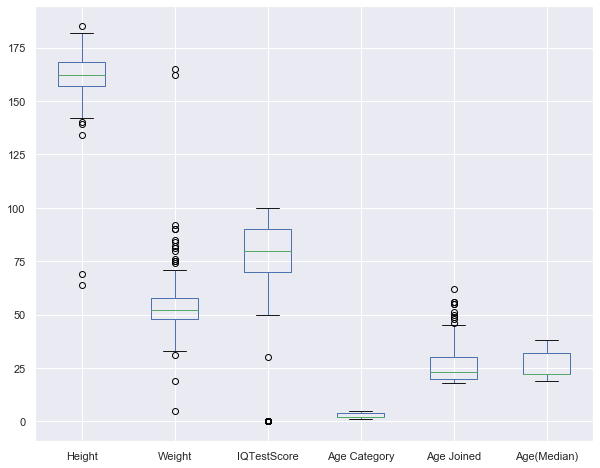

In [120]:
# Box plot data distribution
df = df.drop('ExpectedSalary', axis = 1)

plt.figure(figsize=(20,20))
df.plot.box(df.corr())

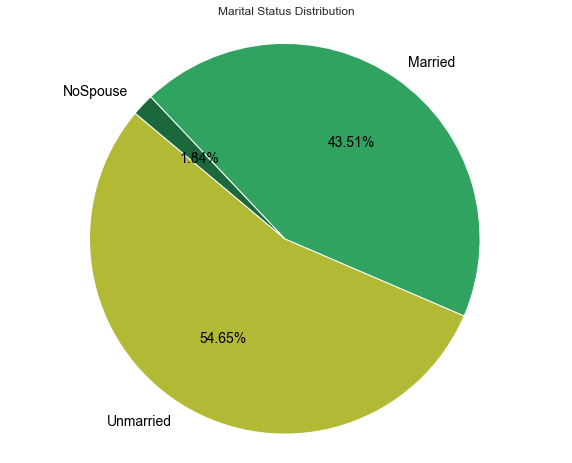

In [121]:
# Pie chart marital status distribution

# Data to plot
labels = 'Unmarried', 'Married', 'NoSpouse'
sizes = [594, 473, 20]
colors = ['#B2BA35', '#30A361', '#1A683B']
explode = (0, 0, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors, startangle=140,autopct='%1.2f%%',textprops={'color':"black",'size':14})
plt.axis('equal')
plt.title("Marital Status Distribution", bbox={'facecolor':'1','pad':15})
plt.show()

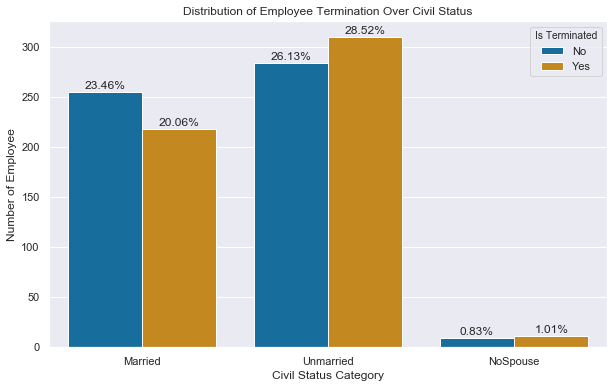

In [122]:
# Show the number of employees that left and stayed by marital status

plt.subplots(figsize=(10,6))
ax = sns.countplot(x='CivilStatus_cat', hue='Is Terminated', data= df, palette = 'colorblind')
ax.set_xlabel('Civil Status Category')
ax.set_ylabel('Number of Employee')
ax.set_title("Distribution of Employee Termination Over Civil Status")
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total * 100),
            ha="center")

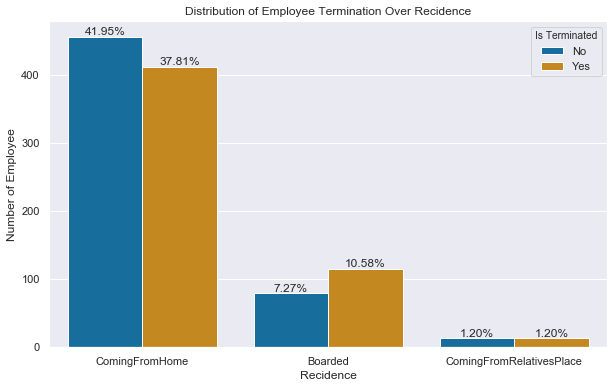

In [123]:
# Show the number of employees that left and stayed by recidence

plt.subplots(figsize=(10,6))
ax = sns.countplot(x='Recidence', hue='Is Terminated', data= df, palette = 'colorblind')
ax.set_xlabel('Recidence')
ax.set_ylabel('Number of Employee')
ax.set_title("Distribution of Employee Termination Over Recidence")
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total * 100),
            ha="center")

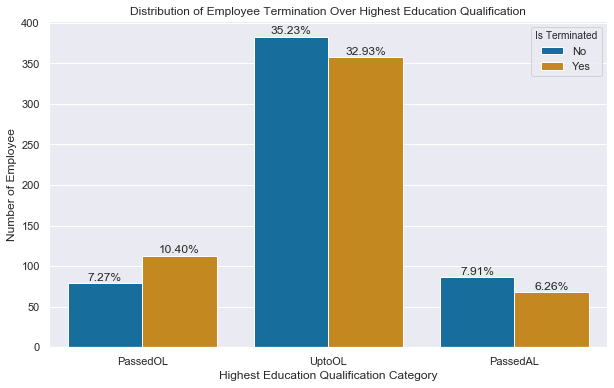

In [124]:
# Show the number of employees that left and stayed by educational qualification category

plt.subplots(figsize=(10,6))
ax = sns.countplot(x='HighestEducationQualification_cat', hue='Is Terminated', data= df, palette = 'colorblind')
ax.set_xlabel('Highest Education Qualification Category')
ax.set_ylabel('Number of Employee')
ax.set_title("Distribution of Employee Termination Over Highest Education Qualification")
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total * 100),
            ha="center")

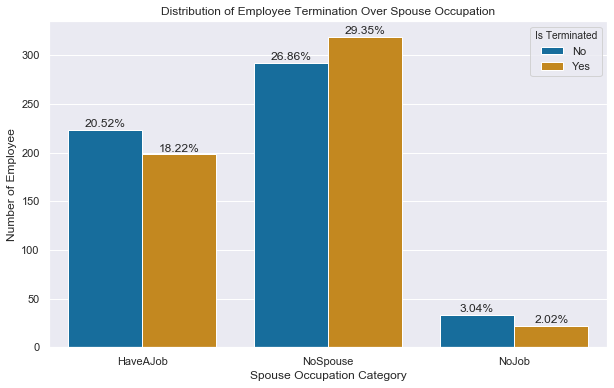

In [125]:
# Show the number of employees that left and stayed by spouse occupation

plt.subplots(figsize=(10,6))
ax = sns.countplot(x='SpouseOccupation_cat', hue='Is Terminated', data= df, palette = 'colorblind')
ax.set_xlabel('Spouse Occupation Category')
ax.set_ylabel('Number of Employee')
ax.set_title("Distribution of Employee Termination Over Spouse Occupation")
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total * 100),
            ha="center")

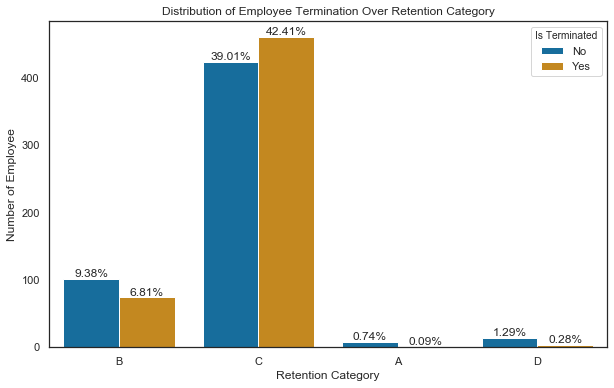

In [80]:
# Show the number of employees that left and stayed by retention category

plt.subplots(figsize=(10,6))
ax = sns.countplot(x='RetentionCategory', hue='Is Terminated', data= df, palette = 'colorblind')
ax.set_xlabel('Retention Category')
ax.set_ylabel('Number of Employee')
ax.set_title("Distribution of Employee Termination Over Retention Category")
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total * 100),
            ha="center")

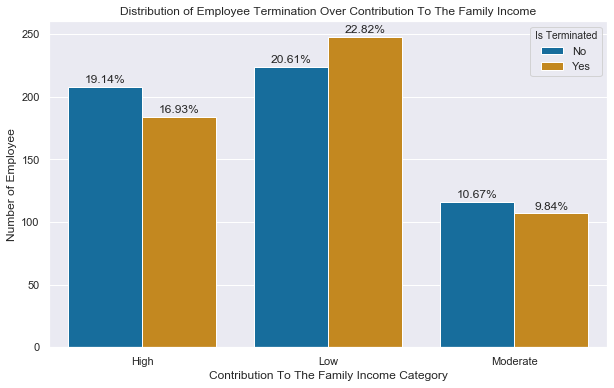

In [128]:
# Show the number of employees that left and stayed by family income

plt.subplots(figsize=(10,6))
ax = sns.countplot(x='ContributionToTheFamilyIncome_cat', hue='Is Terminated', data= df, palette = 'colorblind')
ax.set_xlabel('Contribution To The Family Income Category')
ax.set_ylabel('Number of Employee')
ax.set_title("Distribution of Employee Termination Over Contribution To The Family Income")
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total * 100),
            ha="center")

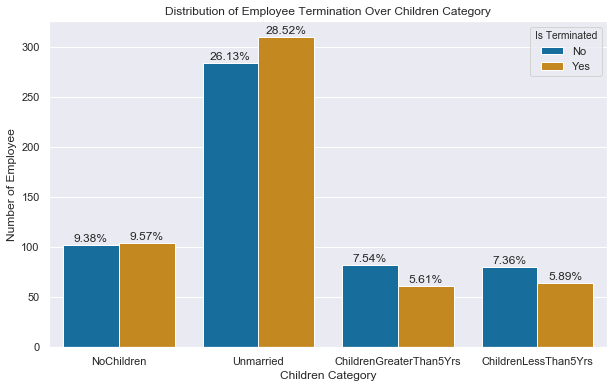

In [129]:
# Show the number of employees that left and stayed by children category

plt.subplots(figsize=(10,6))
ax = sns.countplot(x='Children_cat', hue='Is Terminated', data= df, palette = 'colorblind')
ax.set_xlabel('Children Category')
ax.set_ylabel('Number of Employee')
ax.set_title("Distribution of Employee Termination Over Children Category")
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total * 100),
            ha="center")

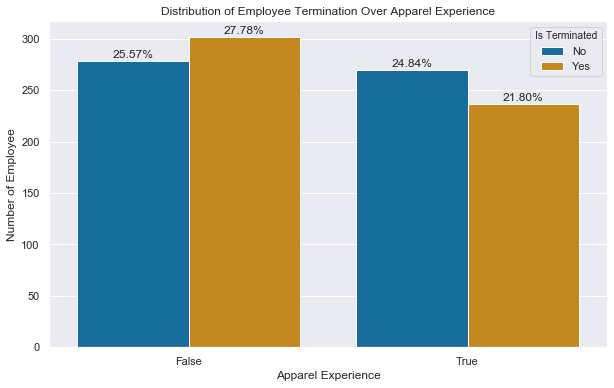

In [130]:
# Show the number of employees that left and stayed by apprel experience

plt.subplots(figsize=(10,6))
ax = sns.countplot(x='ApparelExperience', hue='Is Terminated', data= df, palette = 'colorblind')
ax.set_xlabel('Apparel Experience')
ax.set_ylabel('Number of Employee')
ax.set_title("Distribution of Employee Termination Over Apparel Experience")
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total * 100),
            ha="center")

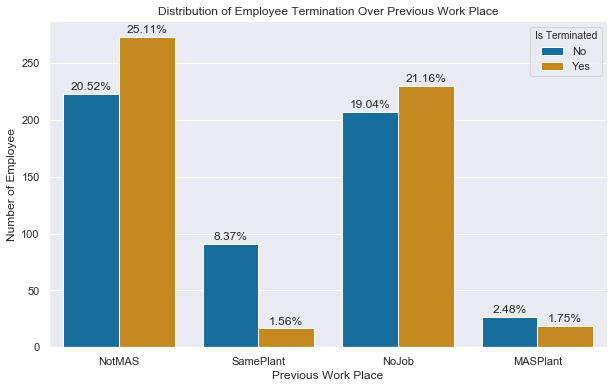

In [131]:
# Show the number of employees that left and stayed by previous work place

total = df.shape[0]
plt.subplots(figsize=(10,6))
ax = sns.countplot(x='PreviousWorkPlace', hue='Is Terminated', data= df, palette = 'colorblind')
ax.set_xlabel('Previous Work Place')
ax.set_ylabel('Number of Employee')
ax.set_title("Distribution of Employee Termination Over Previous Work Place")
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total * 100),
            ha="center")

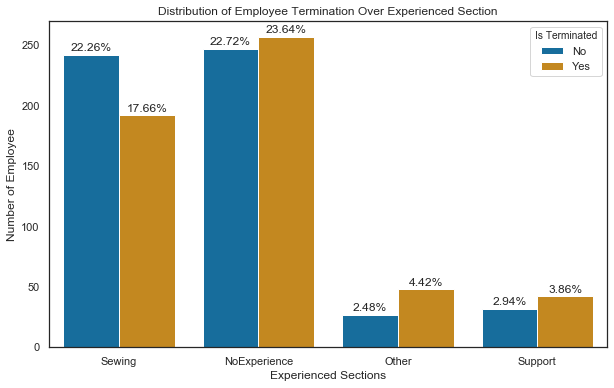

In [85]:
# Show the number of employees that left and stayed by expericen selection

total = df.shape[0]
plt.subplots(figsize=(10,6))
ax = sns.countplot(x='ExperiencedSection_cat', hue='Is Terminated', data= df, palette = 'colorblind')
ax.set_xlabel('Experienced Sections')
ax.set_ylabel('Number of Employee')
ax.set_title("Distribution of Employee Termination Over Experienced Section")
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total * 100),
            ha="center")

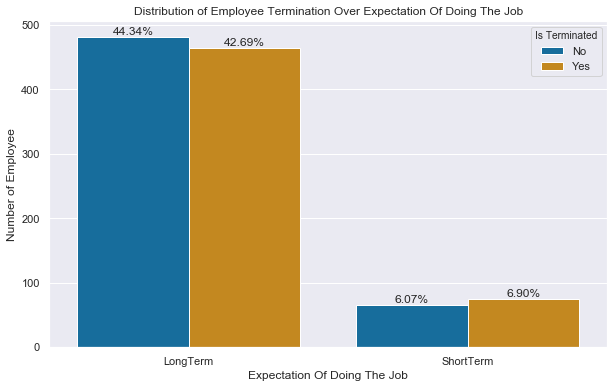

In [132]:
# Show the number of employees that left and stayed by expection of doing the job

total = df.shape[0]
plt.subplots(figsize=(10,6))
ax = sns.countplot(x='ExpectationOfDoingTheJob_cat', hue='Is Terminated', data= df, palette = 'colorblind')
ax.set_xlabel('Expectation Of Doing The Job')
ax.set_ylabel('Number of Employee')
ax.set_title("Distribution of Employee Termination Over Expectation Of Doing The Job")
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total * 100),
            ha="center")

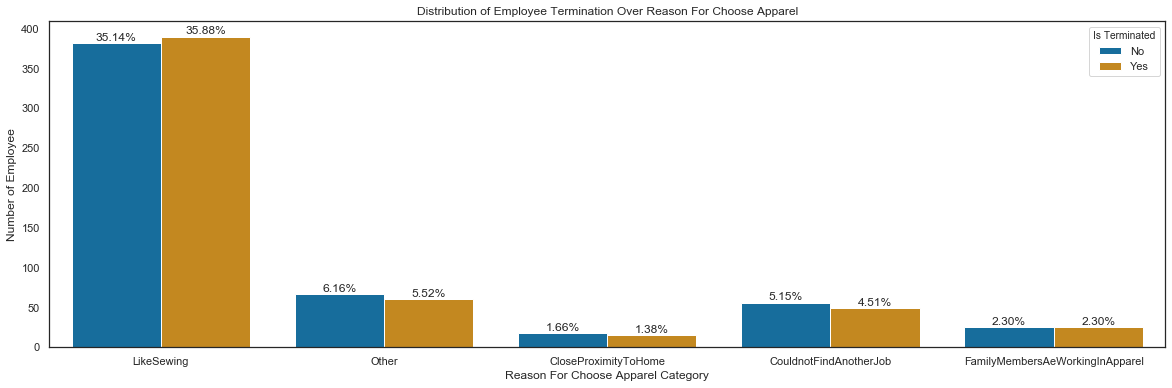

In [87]:
# Show the number of employees that left and stayed by reason for choose apparel

total = df.shape[0]
plt.subplots(figsize=(20,6))
ax = sns.countplot(x='ReasonForChooseApparel', hue='Is Terminated', data= df, palette = 'colorblind')
ax.set_xlabel('Reason For Choose Apparel Category')
ax.set_ylabel('Number of Employee')
ax.set_title("Distribution of Employee Termination Over Reason For Choose Apparel")
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total * 100),
            ha="center")

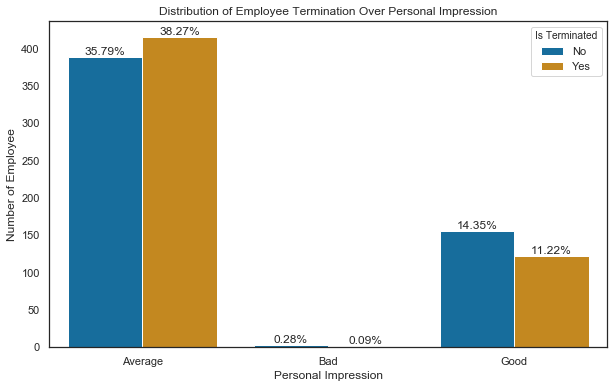

In [88]:
# Show the number of employees that left and stayed by personal impression

total = df.shape[0]
plt.subplots(figsize=(10,6))
ax = sns.countplot(x='PersonalImpression', hue='Is Terminated', data= df, palette = 'colorblind')
ax.set_xlabel('Personal Impression')
ax.set_ylabel('Number of Employee')
ax.set_title("Distribution of Employee Termination Over Personal Impression")
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total * 100),
            ha="center")

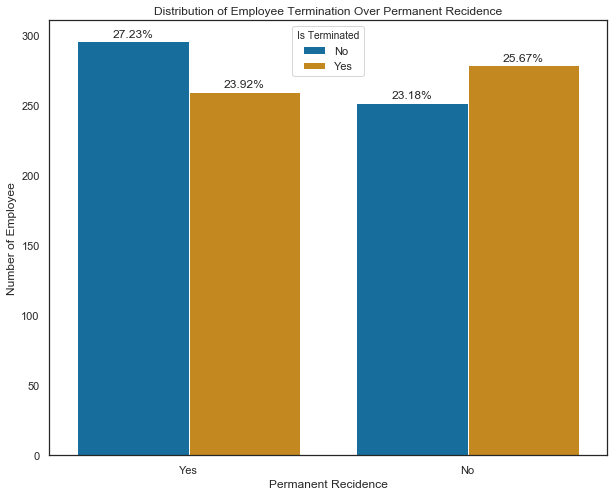

In [89]:
# Show the number of employees that left and stayed by permanent recidence

total = df.shape[0]
plt.subplots(figsize=(10,8))
ax = sns.countplot(x='PermanentRecidence_cat', hue='Is Terminated', data= df, palette = 'colorblind')
ax.set_xlabel('Permanent Recidence')
ax.set_ylabel('Number of Employee')
ax.set_title("Distribution of Employee Termination Over Permanent Recidence")
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total * 100),
            ha="center")

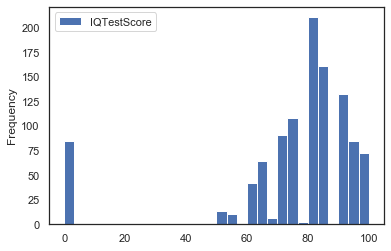

In [90]:
# Histogram IQ
df.plot.hist(y='IQTestScore', bins=30);

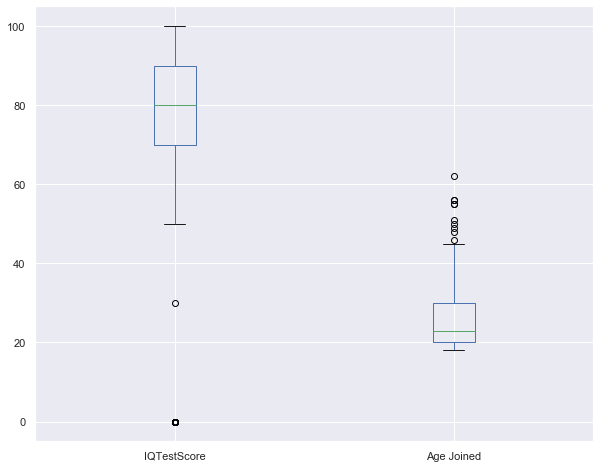

In [134]:
# Box plot IQ vs Age Joined
df.plot.box(y=['IQTestScore', 'Age Joined'])